# 8 simple principles to write better code

1. Write modular code
2. Explicit is better than implicit
3. Write DRY code
4. Consistent and transparent naming
5. Iterate and re-run
6. Refactor code 
7. Avoid Premature Optimization
8. Test code for critical issues

In [2]:
### TIP ### 
# Dependencies always at the top of the script
# Dependencies may broke.
# You wan't to know if all your dependencies are working from the beginning

### TIP ###
# Avoid importing unnecesary dependencies

### TIP ###
# Always make dependencies explicit 
# Don't use 'R profiles' or things that hide your dependencies

import pandas as pd
import numpy as np
from helper_script import bar_plot_percent
%matplotlib inline

## Read in Data

In [3]:
### TIP ###
# Prefer "relative paths" ('../data/survey_results_public.zip') to 
# "full paths" ('~/Desktop/projects/sf_for_beh_ss/data/survey_results_public.zip') 

df = pd.read_csv('../data/survey_results_public.zip', compression='zip')
df.head(2)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult


## Data inspection

In [4]:
### TIP ###
# Comment "intent" over functionality (unless functionality is unclear)
# Functionality: "print the sum of int64 column types"
# Intent: "verify which data types are we working with for preprocessing"
    
print(f'int64 count: {df.dtypes.apply(lambda x: x == "int64").sum()}')
print(f'float64 count: {df.dtypes.apply(lambda x: x == "float64").sum()}')
print(f'object count: {df.dtypes.apply(lambda x: x == "O").sum()}')

int64 count: 1
float64 count: 5
object count: 79


In [5]:
df.shape

(88883, 85)

## Subsetting data scientist

In [6]:
search = ['data scientist', 'data analyst', 'business analyst', 'machine learning'] # keywords to be searched
filter_l = list(df.DevType.astype(str)) # list to be filtered
mask = [True if search[0] in x.lower() or search[1] in x.lower() or search[2] in x.lower() or search[3] in x.lower() else False for x in filter_l] # boolean mask to retain keywords
df_mask = df[mask]
df_ds = df_mask.copy() # we create a new copy to avoid changing the raw data
df_ds.shape

(10675, 85)

## Verify missing values as %

In [7]:
df_ds.isnull().sum().apply(lambda x: np.round((x/len(df_ds))*100, decimals=2)).sort_values(ascending=False).head(10)

CodeRevHrs                45.91
BlockchainOrg             41.07
WebFrameDesireNextYear    35.53
ConvertedComp             34.10
CompTotal                 33.91
WebFrameWorkedWith        33.81
MgrMoney                  30.61
MgrWant                   30.57
MgrIdiot                  30.57
PurchaseHow               29.75
dtype: float64

## Exploratory Data analysis (EDA)

Let's explore the data with a few plots. 

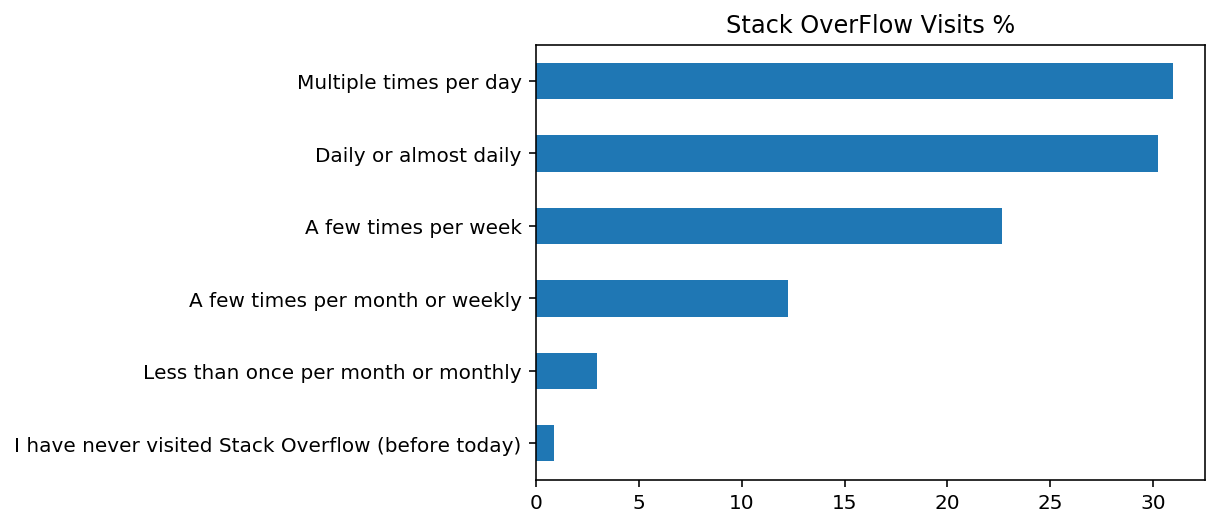

In [8]:
### TIP ### 
#  Break down large sequences of commands into smaller chunks for easier maintenance

SOV_Freq = df_ds['SOVisitFreq'].value_counts()
SOV_Freq_P = SOV_Freq.apply(lambda x: np.round((x/df_ds['SOVisitFreq'].notna().sum())*100, decimals=2))
SOV_Freq_P_S = SOV_Freq_P.sort_values(ascending = True)
SOV_Freq_P_S.plot(kind='barh', title="Stack OverFlow Visits %");

## What if we wan't to do the same for:
- Contrubutes to open source (OpenSourcer)
- Code as a hoby (Hobbyist)
- Is an student (Student)
- Undergraduate major (UndergradMajor)
- Feelings fo competence (ImpSyn)

## DRY: Don't repeat yourself

"Every piece of knowledge must have a single, unambiguous, authoritative representation within a system" This applies to everything in your project: code, data, plots, manuscripts, etc.

Instead of copy+paste our previous line of code, we can create a function in our helper_fun.py file and use it to create multiple plots.

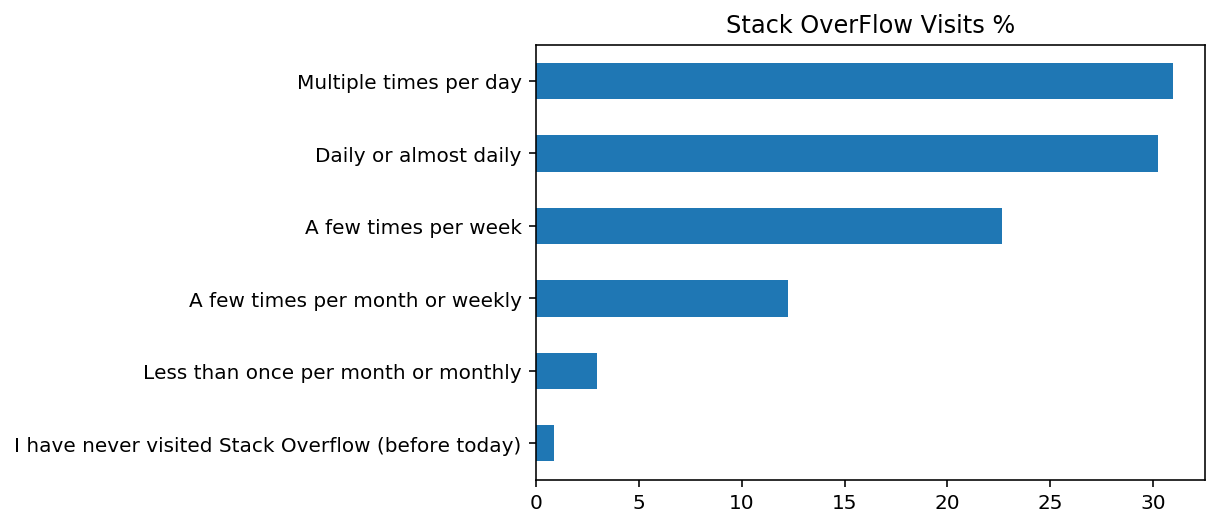

In [9]:
bar_plot_percent('SOVisitFreq', 'barh', 'Stack OverFlow Visits %', sort=True, df=df_ds);

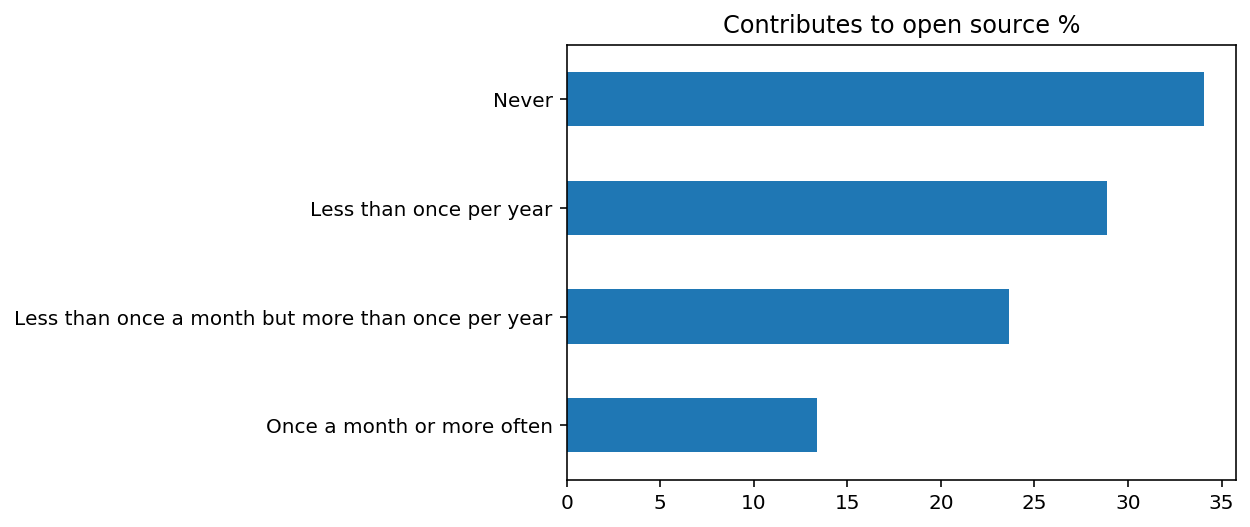

In [10]:
bar_plot_percent('OpenSourcer', 'barh', 'Contributes to open source %', sort=True, df=df_ds);

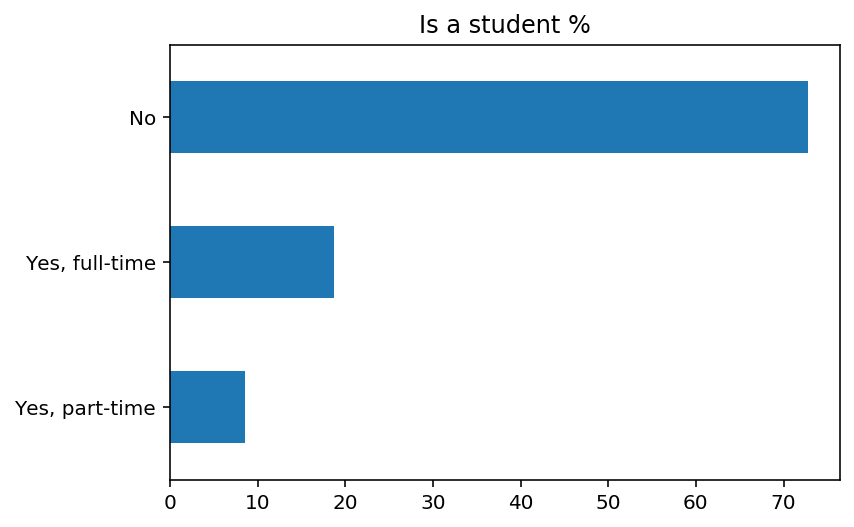

In [11]:
bar_plot_percent('Student', 'barh', 'Is a student %', sort=True, df=df_ds);

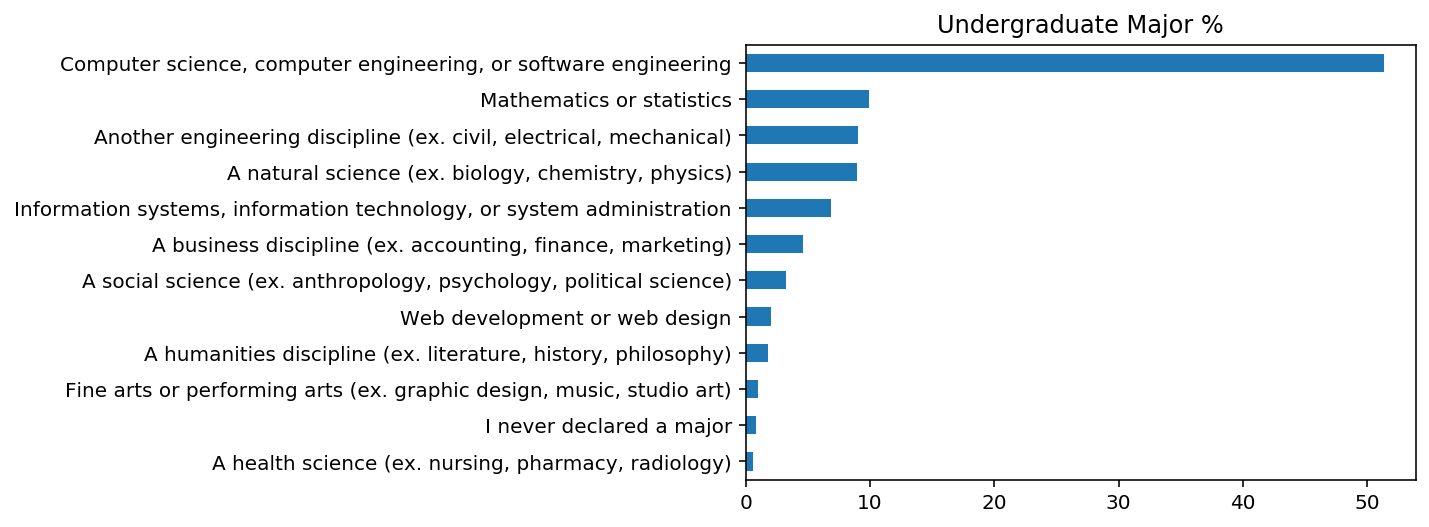

In [12]:
bar_plot_percent('UndergradMajor', 'barh', 'Undergraduate Major %', sort=True, df=df_ds);

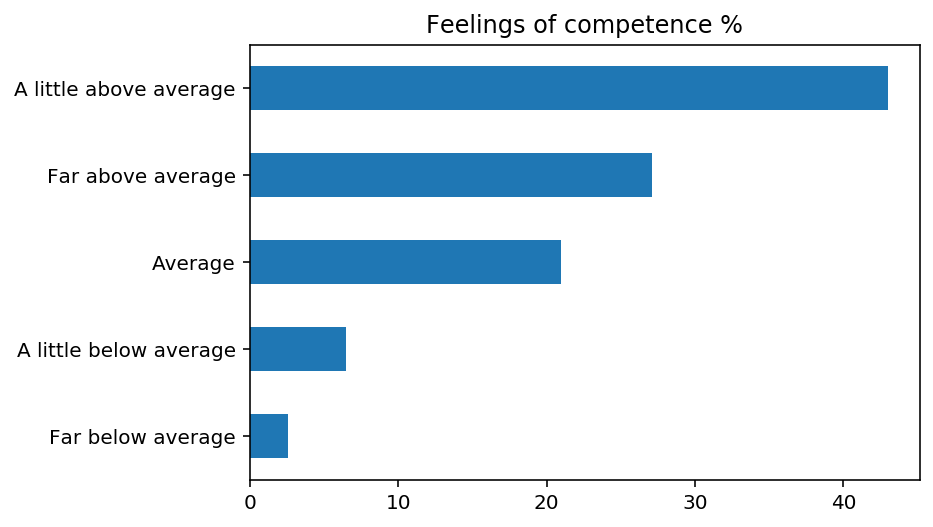

In [13]:
bar_plot_percent('ImpSyn', 'barh', 'Feelings of competence %', sort=True, df=df_ds);

Now we can recreate our plot using our `bar_plot_percent` function

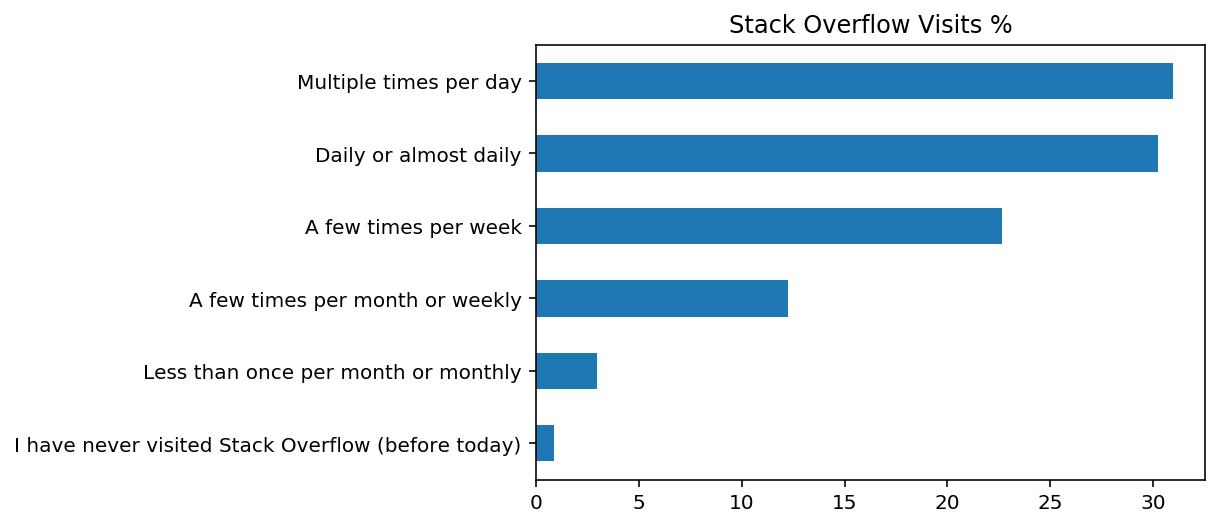

In [14]:
bar_plot_percent('SOVisitFreq', 'barh', 'Stack Overflow Visits %', sort=True, df=df_ds);

## Iterate and re-run

At this point we may want to re-run (top to bottom) our script to verify that our pipeline is working correctly.

`Kernel -> Restar Kernel and Clear All Outputs`

`Run -> Runn All Cells`